In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import kassandra as kass

plt.set_cmap('bwr')

<Figure size 432x288 with 0 Axes>

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

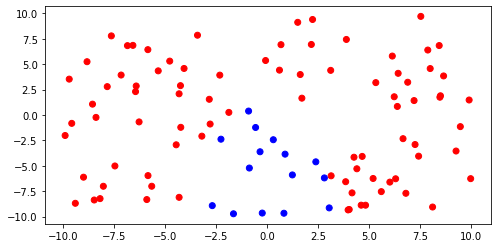

In [3]:
# make data

num_samples = 100

x = np.random.uniform(-10, 10, (num_samples, 2))
y = sigmoid( x[:, 0]**2 + x[:, 1] + -3 ).round(0).reshape(-1, 1)

x1 = np.arange(-10, 10, 0.5)
x2 = np.arange(-10, 10, 0.5)
x1, x2 = np.meshgrid(x1, x2)
feature_space = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])

# plot data

plt.figure(figsize=(8, 4))
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.show()

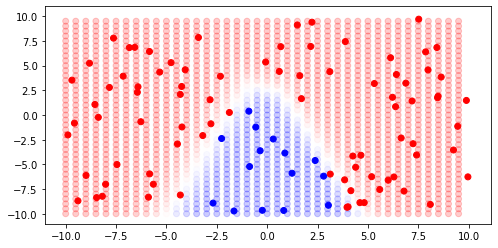

In [4]:
# MLP (epistemic - No)

model = kass.models.MLEMLP(
    activation="relu",
    num_hidden_layers=5,
    num_hidden_units=10,
    optimizer="adam",
    lr=0.05,
    regression=False,
    output_dim=1,
    regularization="l2",
    weight_initializer="glorot_normal"
    )

model.fit(x, y, epochs=500)
y_hat = model.predict(feature_space).numpy()

# plot data

plt.figure(figsize=(8, 4))
plt.scatter(feature_space[:, 0], feature_space[:, 1], c=y_hat[:, 0], alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.show()